In [ ]:
!pip install pandas numpy matplotlib seaborn
!pip install wordcloud
!pip install plotly
!pip install nltk

In [ ]:

print("VISUALIZATION & REPORTING SYSTEM")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

# Configure matplotlib for inline display
%matplotlib inline

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

# Word Cloud
try:
    from wordcloud import WordCloud
    WORDCLOUD_AVAILABLE = True
    print("✓ WordCloud available")
except:
    WORDCLOUD_AVAILABLE = False
    print("⚠ WordCloud not available - install with: pip install wordcloud")

# Plotly for interactive (will display inline)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.io as pio
    pio.renderers.default = "notebook"  # Display inline in notebook
    PLOTLY_AVAILABLE = True
    print("✓ Plotly available")
except:
    PLOTLY_AVAILABLE = False
    print("⚠ Plotly not available - install with: pip install plotly")

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True) # Added to resolve LookupError
print("✓ NLTK resources ready\n")

VISUALIZATION & REPORTING SYSTEM
✓ WordCloud available
✓ Plotly available
✓ NLTK resources ready



In [ ]:

print("STEP 1: LOADING & CLEANING DATA")


class DataCleaner:
    """Comprehensive data cleaning"""

    def __init__(self):
        self.stop_words = set(stopwords.words('english'))

    def clean_text(self, text):
        if pd.isna(text):
            return ""

        text = str(text)


        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'\S+@\S+', '', text)


        text = re.sub(r'@\w+', '', text)

        text = re.sub(r'#(\w+)', r'\1', text)


        text = re.sub(r'\bRT\b', '', text, flags=re.IGNORECASE)


        emoji_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"
                                  u"\U0001F300-\U0001F5FF"
                                  u"\U0001F680-\U0001F6FF"
                                  u"\U0001F1E0-\U0001F1FF"
                                  u"\U00002702-\U000027B0"
                                  u"\U000024C2-\U0001F251"
                                  "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)


        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def extract_keywords(self, text):
        text = text.lower()
        words = word_tokenize(text)
        keywords = [w for w in words if w.isalnum() and w not in self.stop_words and len(w) > 2]
        return keywords


print("\nLoading dataset...")
try:
    df = pd.read_csv("cleaned_dataset.csv.csv")
    print(f"✓ Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print(" Error: 'cleaned_dataset.csv.csv' not found!")
    raise


text_col = 'text' if 'text' in df.columns else 'clean_text'
sentiment_col = 'airline_sentiment'

print(f"✓ Using text column: '{text_col}'")


print("\nCleaning data...")
cleaner = DataCleaner()

df['original_text'] = df[text_col].copy()
df['cleaned_text'] = df[text_col].apply(cleaner.clean_text)
df['keywords'] = df['cleaned_text'].apply(cleaner.extract_keywords)
df = df[df['cleaned_text'].str.strip() != ""].reset_index(drop=True)

print(f"✓ Cleaned: {len(df)} valid records\n")

STEP 1: LOADING & CLEANING DATA

Loading dataset...
✓ Loaded: 10980 rows, 12 columns
✓ Using text column: 'text'

Cleaning data...
✓ Cleaned: 10979 valid records



In [ ]:

print("STEP 2: DATA STATISTICS")


# Calculate statistics
df['text_length'] = df['cleaned_text'].str.len()
df['word_count'] = df['cleaned_text'].str.split().str.len()

sentiment_counts = df[sentiment_col].value_counts()

print(f"\n Dataset Overview:")
print(f"  Total records: {len(df):,}")
print(f"\n  Sentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df)) * 100
    print(f"    • {sentiment.upper():10s}: {count:6,} ({percentage:.1f}%)")

if 'airline' in df.columns:
    print(f"\n  Airlines: {df['airline'].nunique()}")
    print(f"  Most mentioned: {df['airline'].value_counts().index[0]}")

print(f"\n  Text Statistics:")
print(f"    • Avg text length: {df['text_length'].mean():.1f} characters")
print(f"    • Avg word count: {df['word_count'].mean():.1f} words")

# Extract keywords
all_keywords = []
for keywords_list in df['keywords']:
    all_keywords.extend(keywords_list)
keyword_freq = Counter(all_keywords).most_common(30)

print(f"    • Total unique keywords: {len(set(all_keywords)):,}")
print(f"    • Top 5 keywords: {', '.join([w for w, _ in keyword_freq[:5]])}\n")

STEP 2: DATA STATISTICS

 Dataset Overview:
  Total records: 10,979

  Sentiment Distribution:
    • NEGATIVE  :  6,851 (62.4%)
    • NEUTRAL   :  2,326 (21.2%)
    • POSITIVE  :  1,802 (16.4%)

  Airlines: 6
  Most mentioned: United

  Text Statistics:
    • Avg text length: 88.8 characters
    • Avg word count: 16.4 words
    • Total unique keywords: 10,430
    • Top 5 keywords: flight, get, thanks, cancelled, service



STEP 3: GENERATING VISUALIZATIONS

 [1/15] Sentiment Distribution


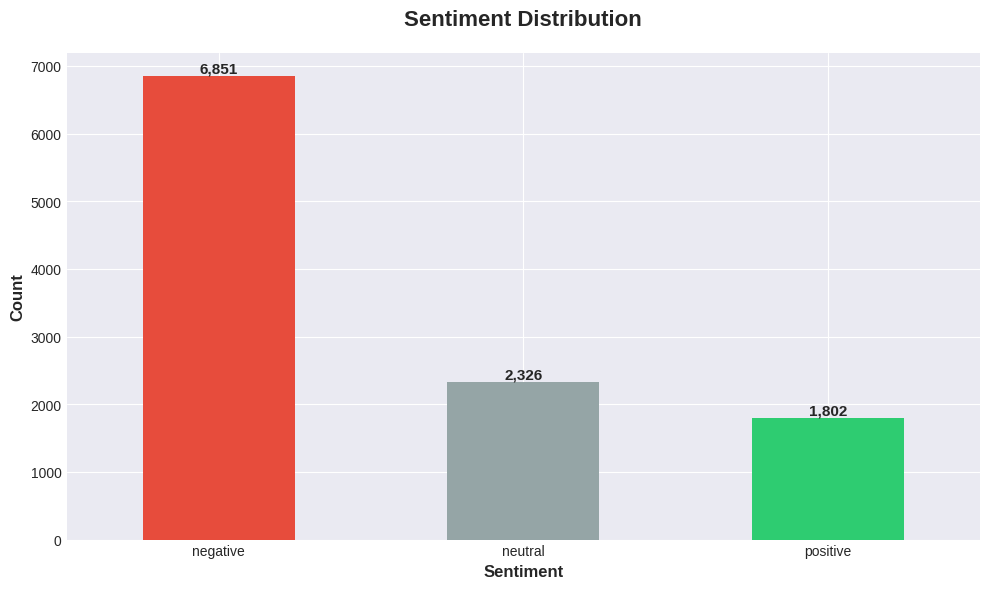

In [ ]:

print("STEP 3: GENERATING VISUALIZATIONS")


# 1. Sentiment Distribution Bar Chart
print("\n [1/15] Sentiment Distribution")
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#e74c3c', '#95a5a6', '#2ecc71']
sentiment_counts.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Sentiment Distribution', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Sentiment', fontsize=12, fontweight='bold')
ax.set_ylabel('Count', fontsize=12, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


for i, v in enumerate(sentiment_counts.values):
    ax.text(i, v + 50, f'{v:,}', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()




 [2/15] Sentiment Pie Chart


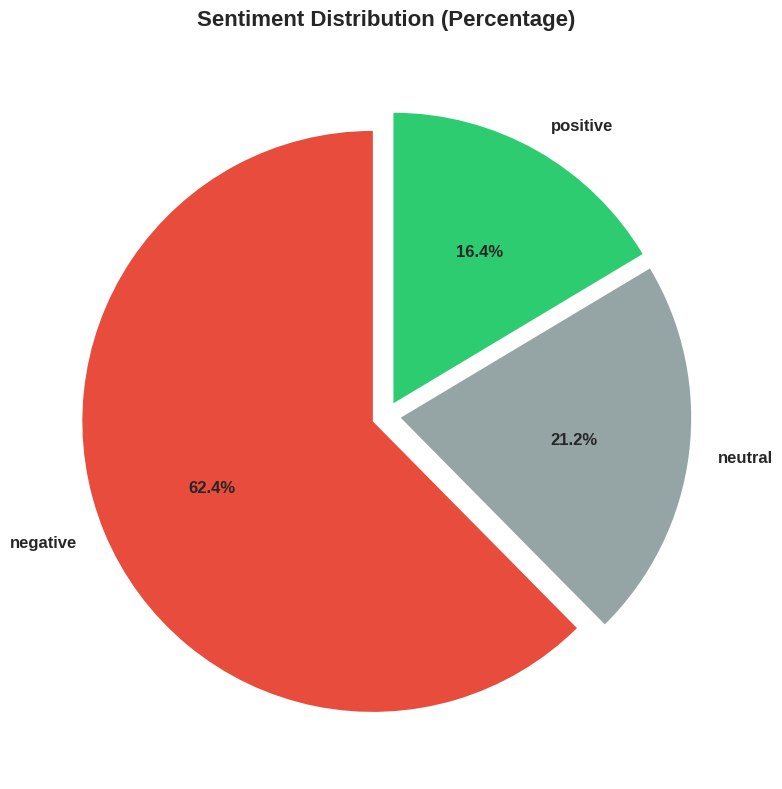

In [ ]:
print("\n [2/15] Sentiment Pie Chart")
fig, ax = plt.subplots(figsize=(10, 8))
explode = (0.05, 0.05, 0.05)
sentiment_counts.plot(kind='pie', ax=ax, colors=colors, explode=explode,
                     autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax.set_title('Sentiment Distribution (Percentage)', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('')
plt.tight_layout()
plt.show()


 [3/15] Airline-wise Sentiment Distribution


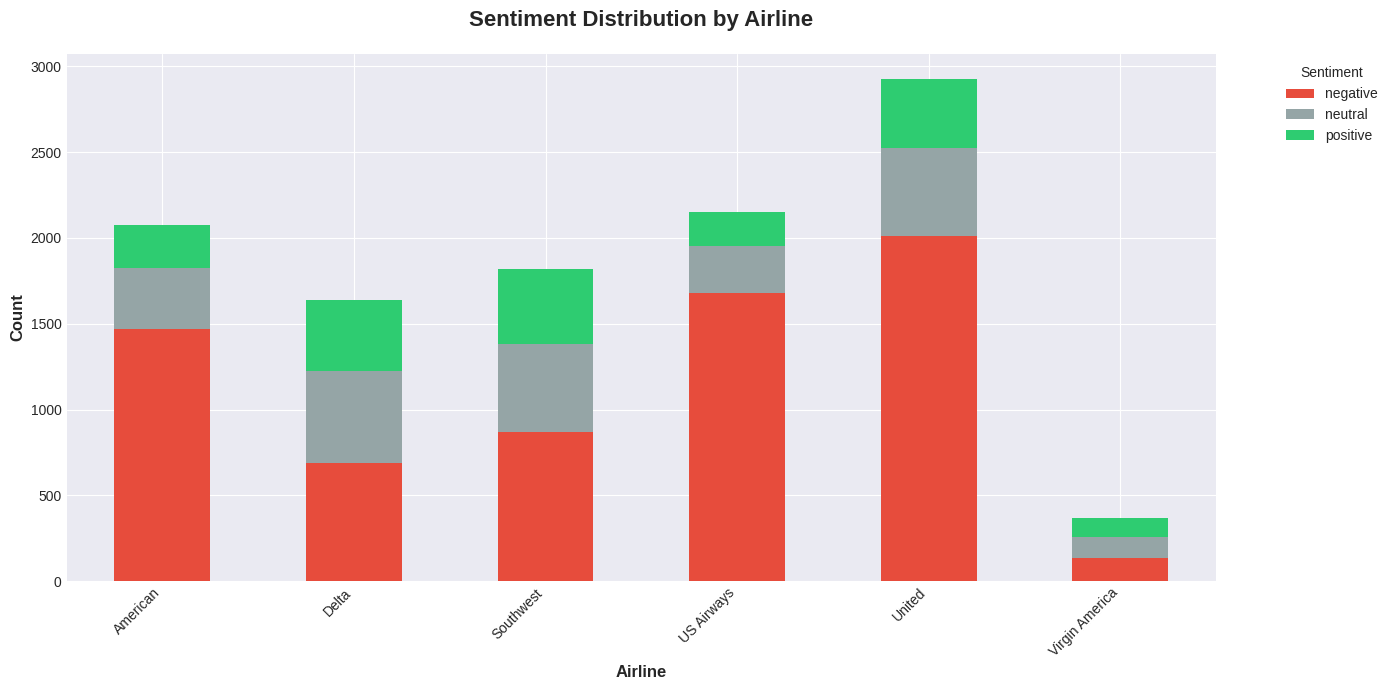

In [ ]:
if 'airline' in df.columns:
    print("\n [3/15] Airline-wise Sentiment Distribution")
    fig, ax = plt.subplots(figsize=(14, 7))

    airline_sentiment = pd.crosstab(df['airline'], df[sentiment_col])
    airline_sentiment.plot(kind='bar', stacked=True, ax=ax, color=colors)

    ax.set_title('Sentiment Distribution by Airline', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Airline', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


 [4/15] Text Length Distribution


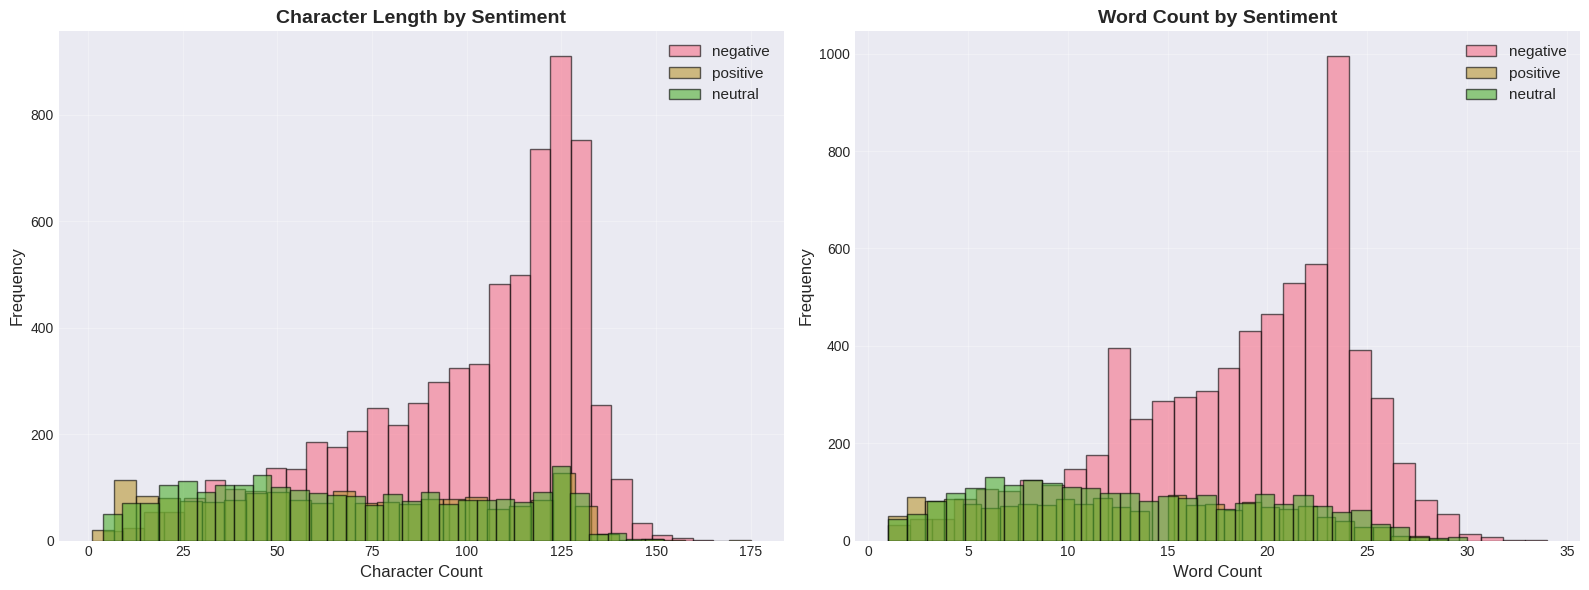

In [ ]:
print("\n [4/15] Text Length Distribution")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


for sentiment in df[sentiment_col].unique():
    data = df[df[sentiment_col] == sentiment]['text_length']
    ax1.hist(data, alpha=0.6, label=sentiment, bins=30, edgecolor='black')

ax1.set_title('Character Length by Sentiment', fontsize=14, fontweight='bold')
ax1.set_xlabel('Character Count', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3)


for sentiment in df[sentiment_col].unique():
    data = df[df[sentiment_col] == sentiment]['word_count']
    ax2.hist(data, alpha=0.6, label=sentiment, bins=30, edgecolor='black')

ax2.set_title('Word Count by Sentiment', fontsize=14, fontweight='bold')
ax2.set_xlabel('Word Count', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()



🔑 [5/15] Top 20 Keywords


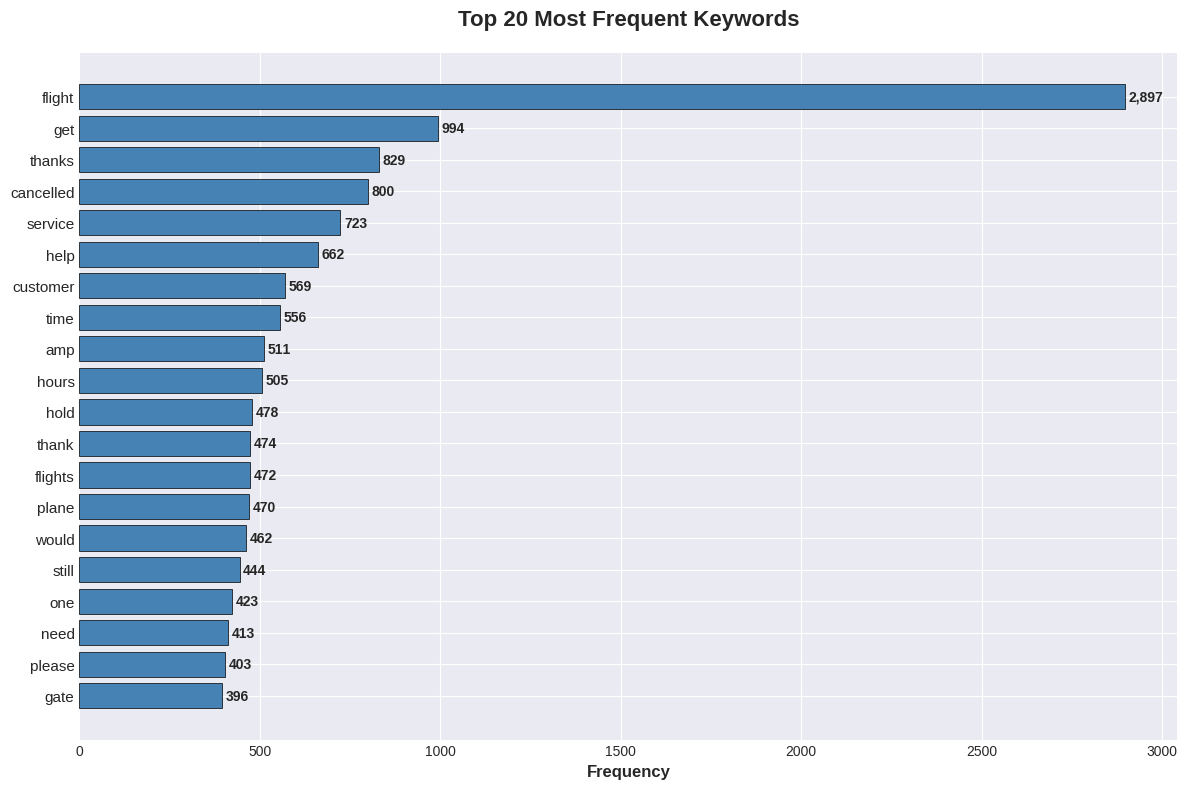

In [ ]:
print("\n [5/15] Top 20 Keywords")
fig, ax = plt.subplots(figsize=(12, 8))
words, counts = zip(*keyword_freq[:20])
y_pos = np.arange(len(words))

bars = ax.barh(y_pos, counts, color='steelblue', edgecolor='black', linewidth=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(words, fontsize=11)
ax.invert_yaxis()
ax.set_title('Top 20 Most Frequent Keywords', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Frequency', fontsize=12, fontweight='bold')

# Add value labels
for i, v in enumerate(counts):
    ax.text(v + 10, i, f'{v:,}', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


☁️ [6-8/15] Generating Word Clouds...


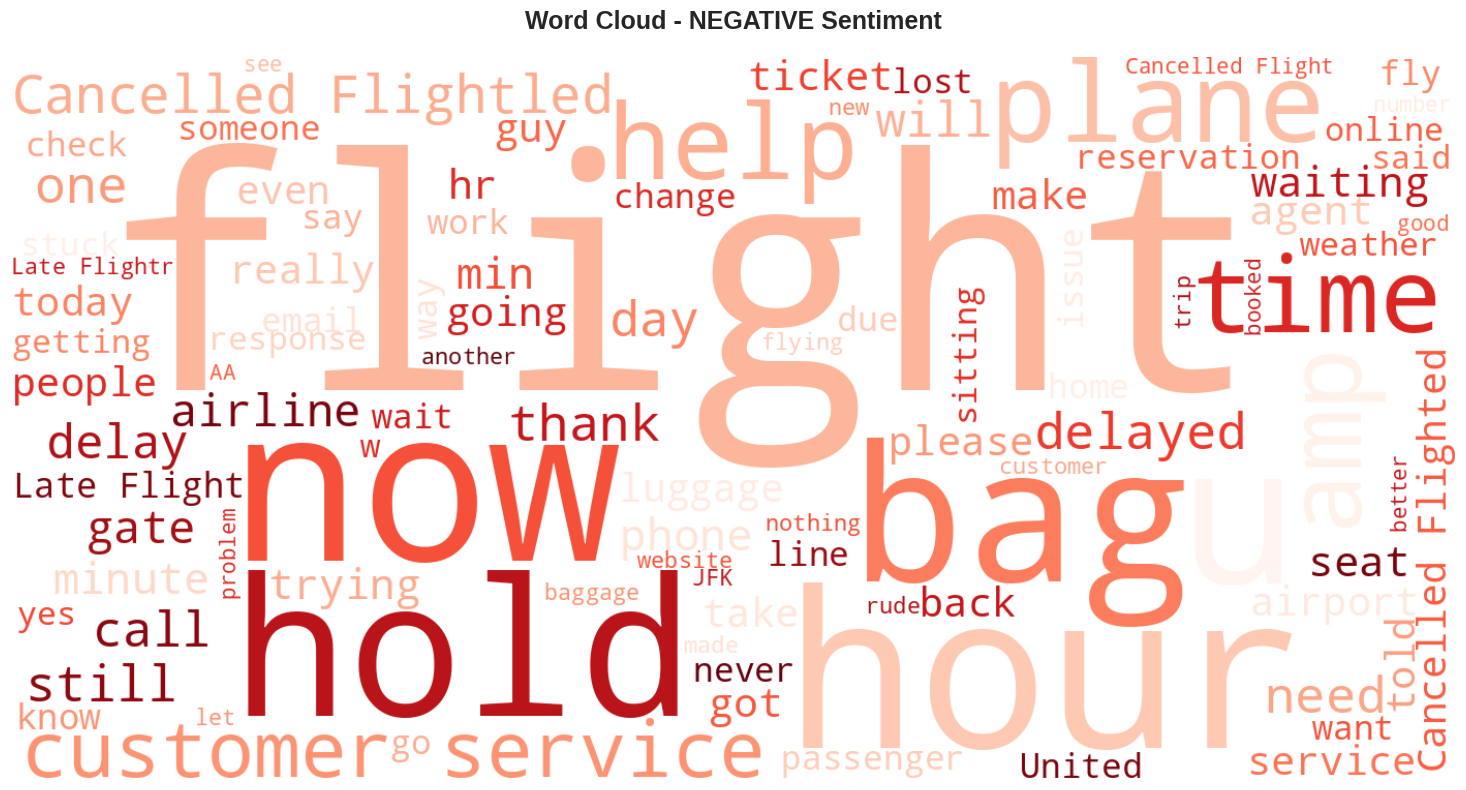

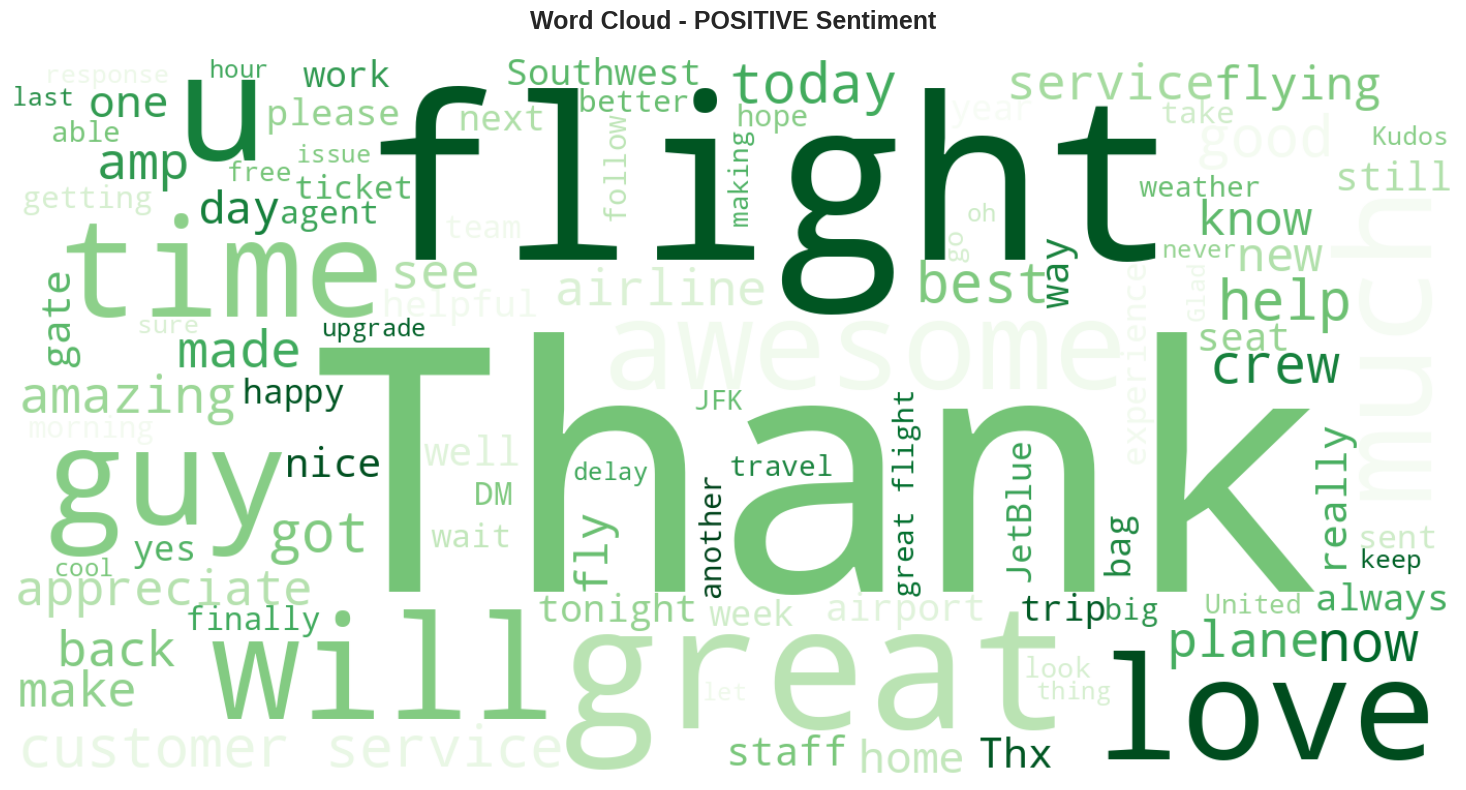

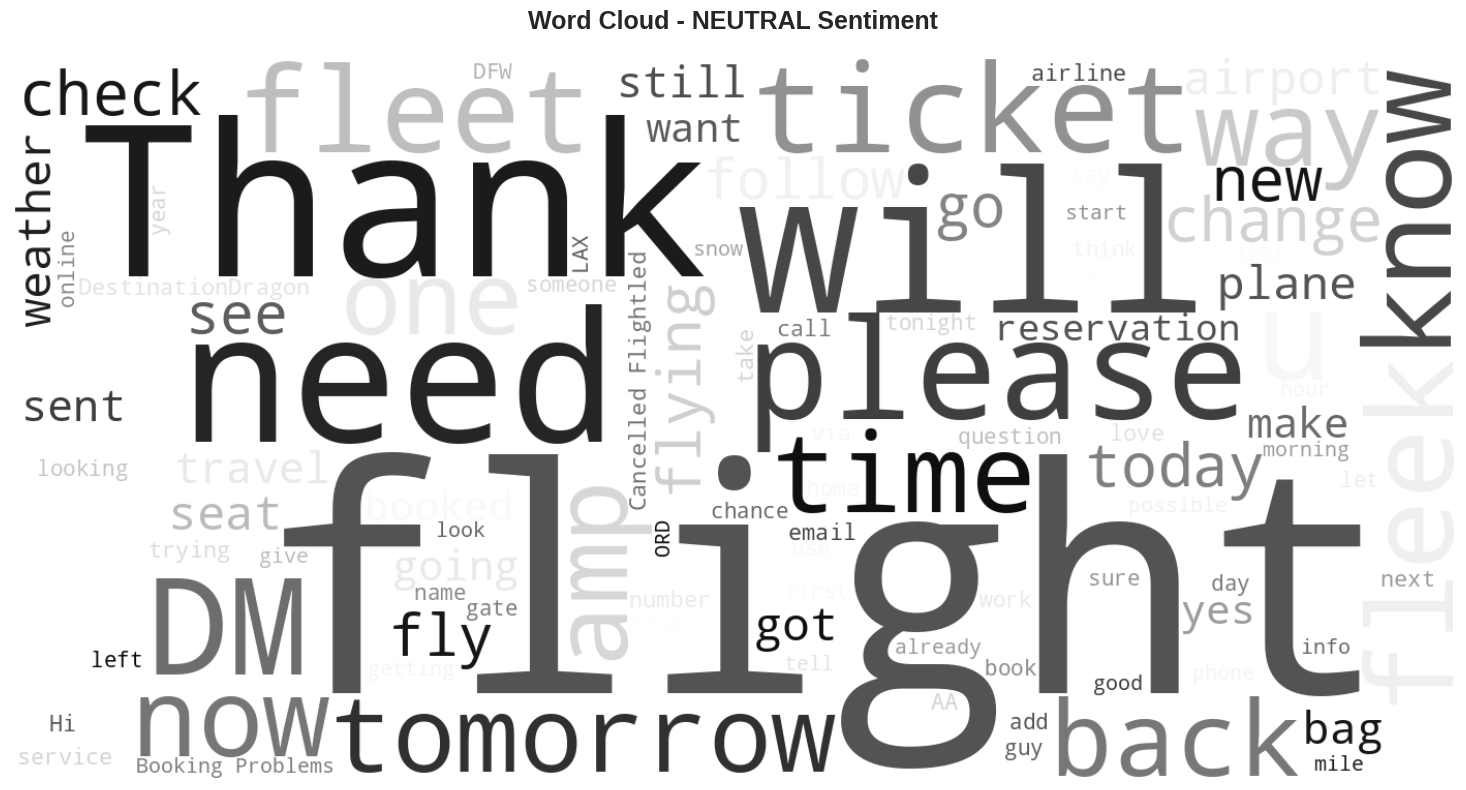

In [ ]:
if WORDCLOUD_AVAILABLE:
    print("\n☁️ [6-8/15] Generating Word Clouds...")

    for idx, sentiment in enumerate(df[sentiment_col].unique(), 6):
        sentiment_text = ' '.join(df[df[sentiment_col] == sentiment]['cleaned_text'])

        # Choose colormap based on sentiment
        if sentiment == 'negative':
            colormap = 'Reds'
        elif sentiment == 'positive':
            colormap = 'Greens'
        else:
            colormap = 'Greys'

        wordcloud = WordCloud(
            width=1400,
            height=700,
            background_color='white',
            colormap=colormap,
            max_words=100,
            relative_scaling=0.5,
            min_font_size=12
        ).generate(sentiment_text)

        fig, ax = plt.subplots(figsize=(16, 8))
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(f'Word Cloud - {sentiment.upper()} Sentiment',
                    fontsize=18, fontweight='bold', pad=20)

        plt.tight_layout()
        plt.show()
else:
    print("\n⚠️ [6-8/15] Word clouds skipped (install wordcloud)")


 [9/15] Sentiment Correlation Heatmap


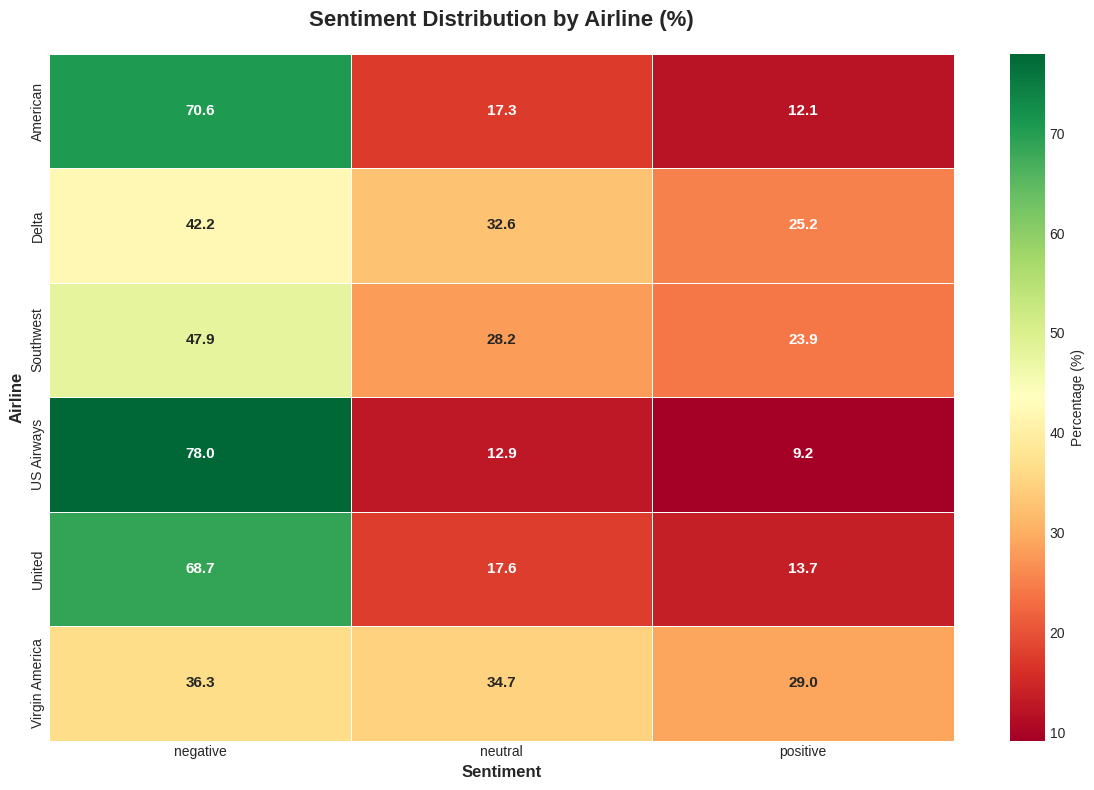

In [ ]:
if 'airline' in df.columns:
    print("\n [9/15] Sentiment Correlation Heatmap")
    pivot_table = pd.crosstab(df['airline'], df[sentiment_col], normalize='index') * 100

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='RdYlGn', ax=ax,
                cbar_kws={'label': 'Percentage (%)'}, linewidths=0.5,
                annot_kws={'fontsize': 11, 'fontweight': 'bold'})
    ax.set_title('Sentiment Distribution by Airline (%)', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Sentiment', fontsize=12, fontweight='bold')
    ax.set_ylabel('Airline', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()


 [10/15] Box Plot - Text Characteristics


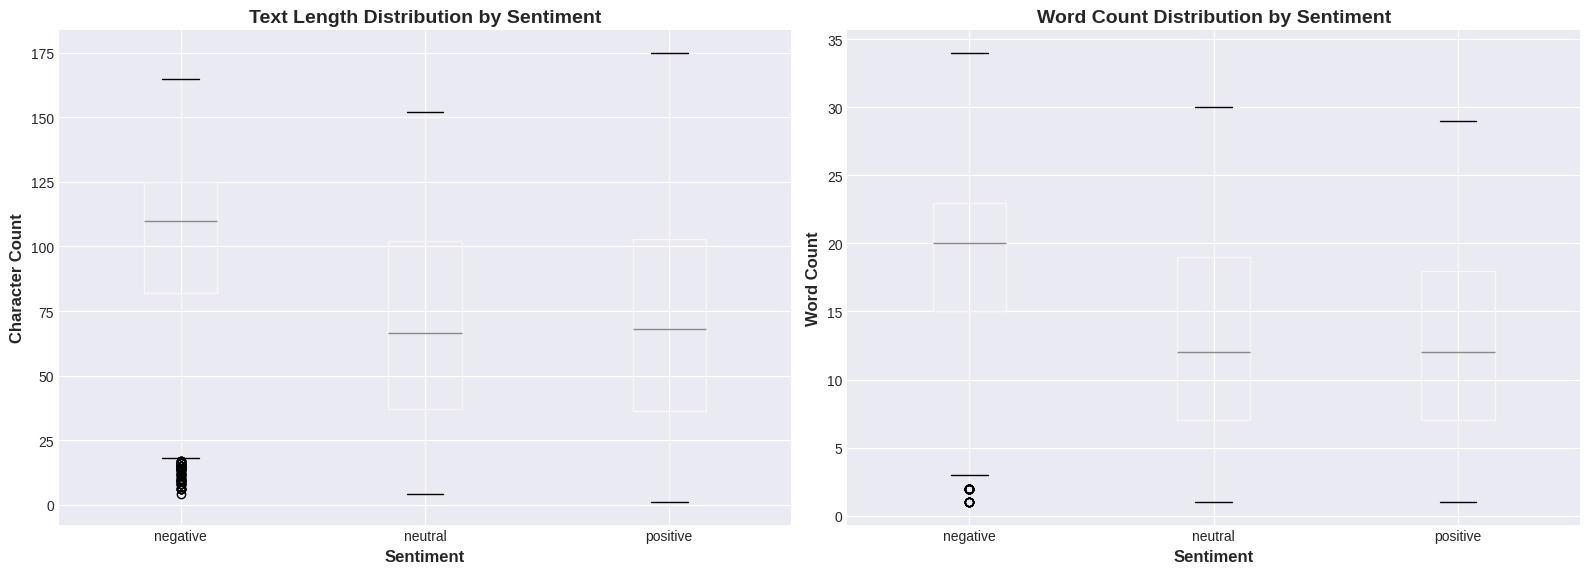

In [ ]:
print("\n [10/15] Box Plot - Text Characteristics")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


df.boxplot(column='text_length', by=sentiment_col, ax=ax1)
ax1.set_title('Text Length Distribution by Sentiment', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment', fontsize=12, fontweight='bold')
ax1.set_ylabel('Character Count', fontsize=12, fontweight='bold')
plt.sca(ax1)
plt.xticks(rotation=0)


df.boxplot(column='word_count', by=sentiment_col, ax=ax2)
ax2.set_title('Word Count Distribution by Sentiment', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sentiment', fontsize=12, fontweight='bold')
ax2.set_ylabel('Word Count', fontsize=12, fontweight='bold')
plt.sca(ax2)
plt.xticks(rotation=0)

fig.suptitle('')
plt.tight_layout()
plt.show()



 [11/15] Violin Plot - Word Count Distribution


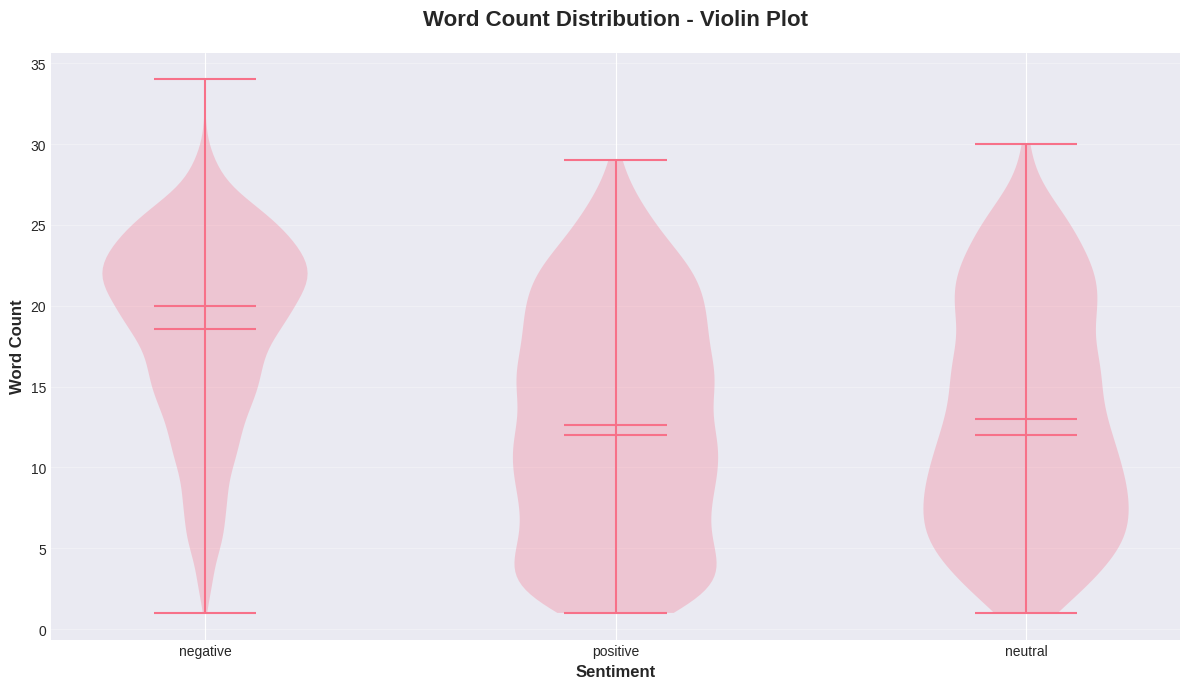

In [ ]:
print("\n [11/15] Violin Plot - Word Count Distribution")
fig, ax = plt.subplots(figsize=(12, 7))
parts = ax.violinplot([df[df[sentiment_col] == s]['word_count'].values
                       for s in df[sentiment_col].unique()],
                      positions=range(len(df[sentiment_col].unique())),
                      showmeans=True, showmedians=True)

ax.set_xticks(range(len(df[sentiment_col].unique())))
ax.set_xticklabels(df[sentiment_col].unique())
ax.set_title('Word Count Distribution - Violin Plot', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Sentiment', fontsize=12, fontweight='bold')
ax.set_ylabel('Word Count', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


 [12/15] Top Keywords by Sentiment


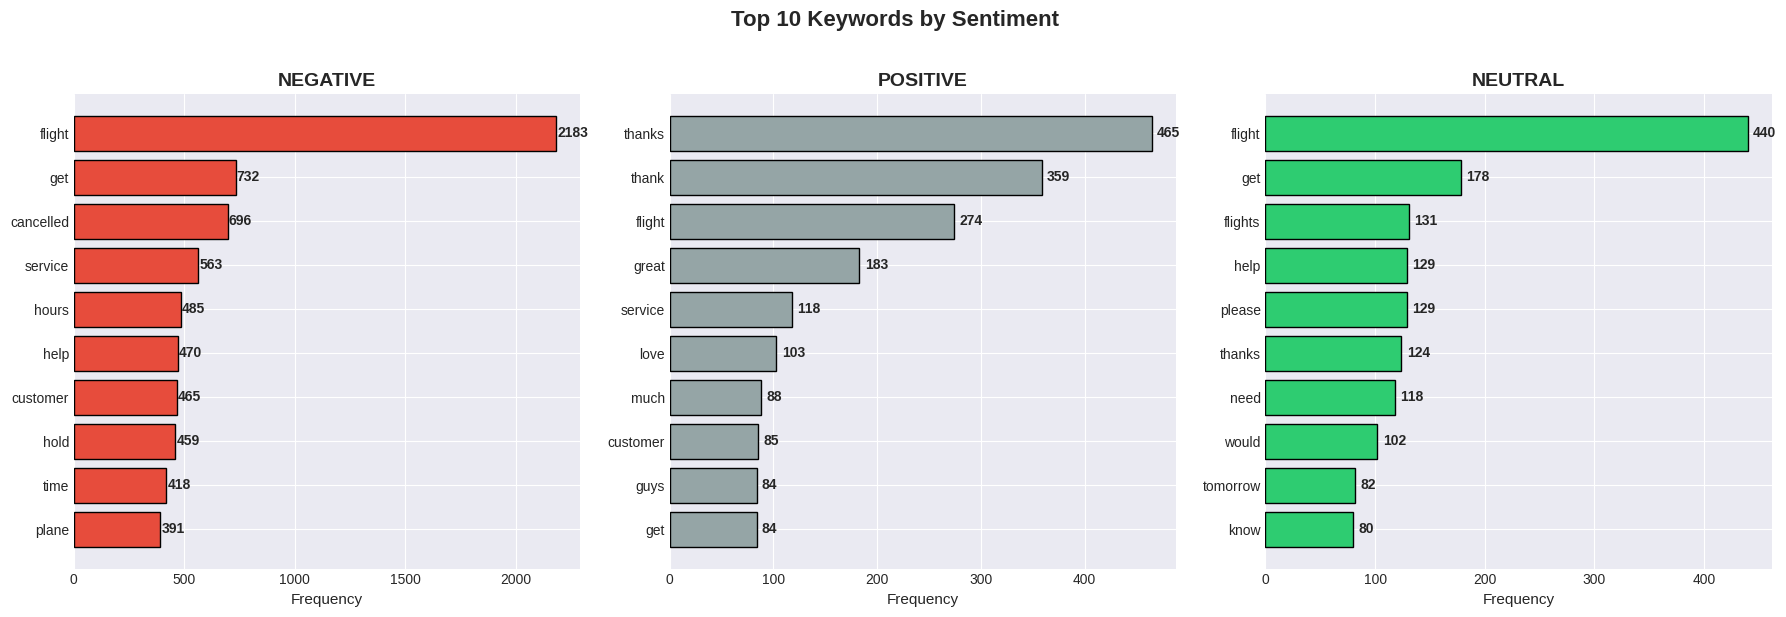

In [ ]:
print("\n [12/15] Top Keywords by Sentiment")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, sentiment in enumerate(df[sentiment_col].unique()):
    sentiment_keywords = []
    for keywords_list in df[df[sentiment_col] == sentiment]['keywords']:
        sentiment_keywords.extend(keywords_list)

    top_10 = Counter(sentiment_keywords).most_common(10)
    words, counts = zip(*top_10) if top_10 else ([], [])

    axes[idx].barh(range(len(words)), counts, color=colors[idx], edgecolor='black')
    axes[idx].set_yticks(range(len(words)))
    axes[idx].set_yticklabels(words)
    axes[idx].invert_yaxis()
    axes[idx].set_title(f'{sentiment.upper()}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Frequency', fontsize=11)

    for i, v in enumerate(counts):
        axes[idx].text(v + 5, i, str(v), va='center', fontweight='bold')

fig.suptitle('Top 10 Keywords by Sentiment', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


 [13/15] Comprehensive Analysis Dashboard


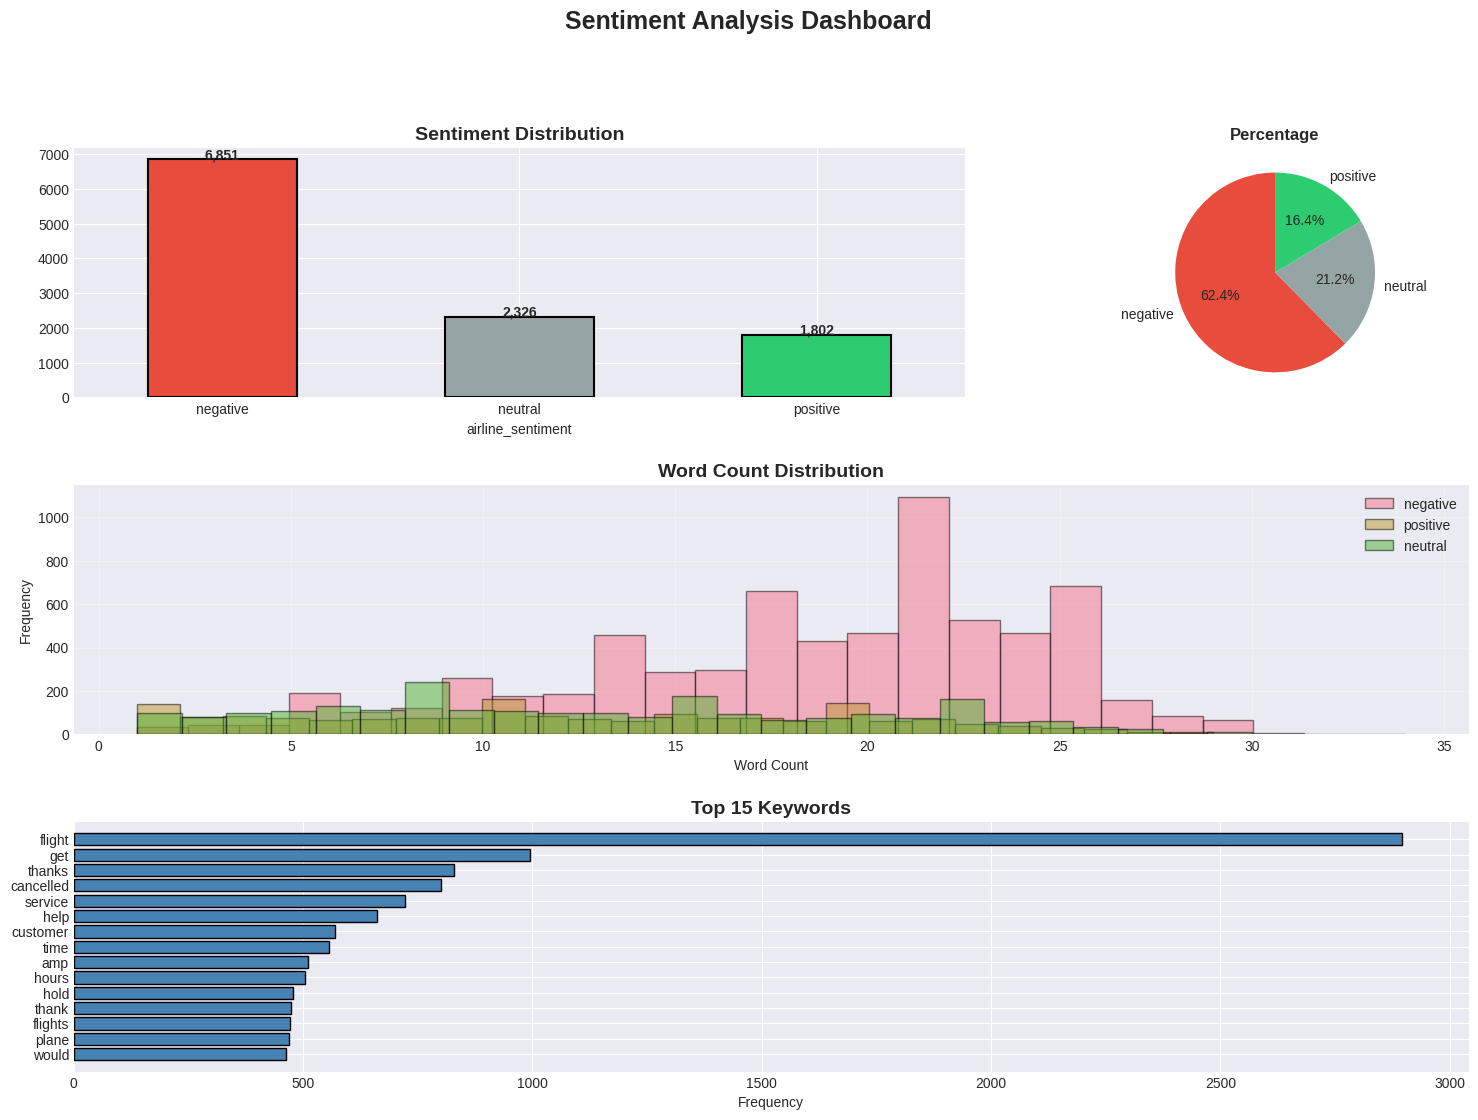

In [ ]:
print("\n [13/15] Comprehensive Analysis Dashboard")
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)


ax1 = fig.add_subplot(gs[0, :2])
sentiment_counts.plot(kind='bar', ax=ax1, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
for i, v in enumerate(sentiment_counts.values):
    ax1.text(i, v + 20, f'{v:,}', ha='center', fontweight='bold')


ax2 = fig.add_subplot(gs[0, 2])
sentiment_counts.plot(kind='pie', ax=ax2, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_ylabel('')
ax2.set_title('Percentage', fontsize=12, fontweight='bold')


ax3 = fig.add_subplot(gs[1, :])
for sentiment in df[sentiment_col].unique():
    data = df[df[sentiment_col] == sentiment]['word_count']
    ax3.hist(data, alpha=0.5, label=sentiment, bins=25, edgecolor='black')
ax3.set_title('Word Count Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Word Count')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(alpha=0.3)


ax4 = fig.add_subplot(gs[2, :])
top_15_words, top_15_counts = zip(*keyword_freq[:15])
ax4.barh(range(len(top_15_words)), top_15_counts, color='steelblue', edgecolor='black')
ax4.set_yticks(range(len(top_15_words)))
ax4.set_yticklabels(top_15_words)
ax4.invert_yaxis()
ax4.set_title('Top 15 Keywords', fontsize=14, fontweight='bold')
ax4.set_xlabel('Frequency')

fig.suptitle('Sentiment Analysis Dashboard', fontsize=18, fontweight='bold', y=0.995)
plt.show()

In [ ]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'  # or 'browser' for .py files


In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'


In [ ]:
pio.renderers.default = 'iframe_connected'


In [ ]:
if PLOTLY_AVAILABLE:

    print("STEP 4: INTERACTIVE VISUALIZATIONS")



    print("\n [14/15] Interactive Sentiment Distribution")


    sentiment_df = sentiment_counts.reset_index()
    sentiment_df.columns = ['sentiment', 'count']

    fig = px.bar(sentiment_df,
                 x='sentiment', y='count',
                 labels={'sentiment': 'Sentiment', 'count': 'Count'},
                 title='<b>Interactive Sentiment Distribution</b>',
                 color='sentiment',
                 color_discrete_map={'negative': '#e74c3c', 'neutral': '#95a5a6', 'positive': '#2ecc71'},
                 text='count')
    fig.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig.update_layout(showlegend=False, font=dict(size=13), height=600)
    fig.show()


    if 'airline' in df.columns:
        print("\n [15/15] Interactive Airline Sentiment Analysis")
        airline_sentiment = pd.crosstab(df['airline'], df[sentiment_col])

        fig = go.Figure()
        for sentiment in airline_sentiment.columns:
            fig.add_trace(go.Bar(
                name=sentiment,
                x=airline_sentiment.index,
                y=airline_sentiment[sentiment],
                text=airline_sentiment[sentiment],
                textposition='auto',
                texttemplate='%{text:,}'
            ))

        fig.update_layout(
            title='<b>Interactive Airline Sentiment Distribution</b>',
            xaxis_title='Airline',
            yaxis_title='Count',
            barmode='stack',
            font=dict(size=13),
            hovermode='x unified',
            height=600
        )
        fig.show()


        print("\n Interactive Sunburst Chart")
        fig = px.sunburst(df, path=['airline', sentiment_col],
                         title='<b>Sentiment by Airline - Sunburst View</b>',
                         height=700)
        fig.update_layout(font=dict(size=13))
        fig.show()


        print("\n [BONUS 2] Interactive Treemap")
        treemap_data = df.groupby(['airline', sentiment_col]).size().reset_index(name='count')
        fig = px.treemap(treemap_data, path=['airline', sentiment_col], values='count',
                        title='<b>Sentiment Distribution - Treemap View</b>',
                        color='count', color_continuous_scale='RdYlGn',
                        height=700)
        fig.update_layout(font=dict(size=13))
        fig.show()

else:
    print("\n [14-15/15] Interactive visualizations skipped (install plotly)")

STEP 4: INTERACTIVE VISUALIZATIONS

 [14/15] Interactive Sentiment Distribution



 [15/15] Interactive Airline Sentiment Analysis



 Interactive Sunburst Chart



 [BONUS 2] Interactive Treemap


In [ ]:

print("SUMMARY REPORT")


print(f"\n ANALYSIS COMPLETE!")
print(f"\n Key Statistics:")
print(f"  • Total records analyzed: {len(df):,}")
print(f"  • Negative sentiment: {sentiment_counts.get('negative', 0):,} ({(sentiment_counts.get('negative', 0)/len(df)*100):.1f}%)")
print(f"  • Neutral sentiment: {sentiment_counts.get('neutral', 0):,} ({(sentiment_counts.get('neutral', 0)/len(df)*100):.1f}%)")
print(f"  • Positive sentiment: {sentiment_counts.get('positive', 0):,} ({(sentiment_counts.get('positive', 0)/len(df)*100):.1f}%)")
print(f"  • Average text length: {df['text_length'].mean():.1f} characters")
print(f"  • Average word count: {df['word_count'].mean():.1f} words")
print(f"  • Total unique keywords: {len(set(all_keywords)):,}")

print(f"\n Top 10 Keywords:")
for i, (word, count) in enumerate(keyword_freq[:10], 1):
    print(f"  {i:2d}. {word:20s}: {count:5,} occurrences")

if 'airline' in df.columns:
    print(f"\n Airline Analysis:")
    for airline in df['airline'].value_counts().head(5).index:
        count = len(df[df['airline'] == airline])
        print(f"  • {airline:15s}: {count:5,} mentions")

print(f"\n Visualizations Generated:")
print(f"  • Static charts: ~13 visualizations")
if PLOTLY_AVAILABLE:
    print(f"  • Interactive charts: 3-4 visualizations")
print(f"  • All displayed inline in notebook")

print("\n" + "=" * 80)

SUMMARY REPORT

 ANALYSIS COMPLETE!

 Key Statistics:
  • Total records analyzed: 10,979
  • Negative sentiment: 6,851 (62.4%)
  • Neutral sentiment: 2,326 (21.2%)
  • Positive sentiment: 1,802 (16.4%)
  • Average text length: 88.8 characters
  • Average word count: 16.4 words
  • Total unique keywords: 10,430

 Top 10 Keywords:
   1. flight              : 2,897 occurrences
   2. get                 :   994 occurrences
   3. thanks              :   829 occurrences
   4. cancelled           :   800 occurrences
   5. service             :   723 occurrences
   6. help                :   662 occurrences
   7. customer            :   569 occurrences
   8. time                :   556 occurrences
   9. amp                 :   511 occurrences
  10. hours               :   505 occurrences

 Airline Analysis:
  • United         : 2,927 mentions
  • US Airways     : 2,152 mentions
  • American       : 2,078 mentions
  • Southwest      : 1,817 mentions
  • Delta          : 1,639 mentions

 Visuali